In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_json('/Users/rickroma/PycharmProjects/BIA_660_D/Assignment_03/reviews.json')

In [27]:
df.count()

date        1250
headline    1250
name        1250
stars       1250
text        1250
dtype: int64

In [28]:
df['month'] = df['date'].dt.to_period('M')
df.head(10)

,date,headline,name,stars,text,month
0,2017-03-04,Quality made and a fantastic deal! Let me sho...,GardenGuy,5,These Rockbirds LED Flashlights I bought came...,2017-03
1,2018-02-10,"Miniature in size & price, but big on light ou...",NSB,4,"Given my many prior, poor experiences with sev...",2018-02
10,2017-12-10,Not happy with modes!!!!,BillyBobBooooooJohnson,2,I ordered similar lights to this in the past.....,2017-12
100,2017-07-13,Perfect size for dusk dog walking,Crazy Cattle Dog Lady,5,I bought these in lightening deal not entirely...,2017-07
1000,2017-08-12,Five Stars,Mike,5,Great for the price!,2017-08
1001,2018-04-14,Five Stars,Josh,5,These lights are alot nicer than I expected fo...,2018-04
1002,2012-11-13,"I like the light, durable and mobile",T A,4,Though I received it later than the expected d...,2012-11
1003,2014-11-24,Five Stars,Benb,5,Have given away several and have ordered more.,2014-11
1004,2012-12-18,nice flashlight,aong714,5,This is surprisingly bright for the size. I l...,2012-12
1005,2017-09-27,Good buy.,Brent M.,5,Excellent quality.,2017-09


In [29]:
review_by_date = df.groupby('month').size()
print(review_by_date)

month
2012-11     46
2012-12     42
2013-01     37
2013-02     22
2013-03     22
2013-04     14
2013-05     24
2013-06     19
2013-07     15
2013-08     12
2013-09     10
2013-10     14
2013-11     23
2013-12     16
2014-01     13
2014-02     13
2014-03      8
2014-04      2
2014-05      3
2014-06      4
2014-07      5
2014-08      3
2014-09      3
2014-10      6
2014-11      8
2014-12      7
2015-01      6
2015-02      5
2015-03      3
2015-04      5
          ... 
2015-06      2
2015-09      3
2015-10      1
2015-11      2
2015-12      2
2016-01      1
2016-02      1
2016-03      1
2016-04      1
2016-05      1
2016-07      1
2016-09      1
2016-11     10
2016-12     12
2017-01     13
2017-02     11
2017-03     34
2017-04     56
2017-05     82
2017-06     48
2017-07     75
2017-08     50
2017-09    108
2017-10     71
2017-11     50
2017-12     35
2018-01     26
2018-02     20
2018-03     22
2018-04     97
Freq: M, Length: 61, dtype: int64


In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
import nltk

cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

df["Text_Clean"] = df["text"].apply(cleanup)

train, test = train_test_split(df, test_size=0.2)
print("%d items in training data, %d in test data" % (len(train), len(test)))

1000 items in training data, 250 in test data


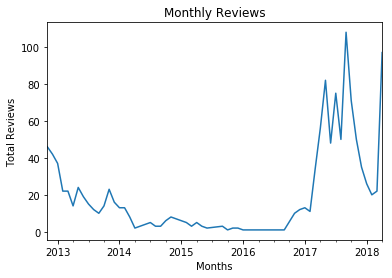

In [30]:
plot_by_month = review_by_date.plot(title='Monthly Reviews')
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Reviews')
plt.show()

In [49]:
X = df['text']
y = df['stars']

c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model,clf_model,coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('-Top 20 positive-')
        print(coeff_df.head(20).to_string(index=False))
        print('')
        print('-Top 20 negative-')        
        print(coeff_df.tail(20).to_string(index=False))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 3391
# train records: 937
# test records: 313
Model Accuracy: 0.6517571884984026

-Top 20 positive-
Coefficient           Word
   1.365796           junk
   1.348271         return
   1.100347            don
   1.099033        returns
   1.043341           poor
   0.997090           didn
   0.927102           week
   0.910329           weak
   0.845347        garbage
   0.842131           uses
   0.831406     unreliable
   0.804610       stripped
   0.783984           does
   0.772199          tried
   0.769239         expect
   0.750234            doa
   0.747072         heated
   0.743579         worked
   0.742016  disappointing
   0.713739        threads

-Top 20 negative-
Coefficient       Word
  -0.437321        car
  -0.439051   brighter
  -0.449976    compact
  -0.485013   expected
  -0.494824   powerful
  -0.519894       pack
  -0.519983     better
  -0.550902       know
  -0.567689      small
  -0.586463     switch
  -0.606185    awesome
  -0.615939  excellent
  -

In [51]:
from sklearn.dummy import DummyClassifier
text_fit(X, y, c, DummyClassifier(),0)

# features: 3391
# train records: 937
# test records: 313
Model Accuracy: 0.5079872204472844


In [52]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 3391
# train records: 937
# test records: 313
Model Accuracy: 0.6485623003194888

-Top 20 positive-
Coefficient           Word
   1.727881           junk
   1.297878         return
   1.174736         worked
   1.158953           does
   1.113551           poor
   1.109380        returns
   1.074522            don
   1.027624           didn
   1.017470           weak
   0.922824           week
   0.922592          tried
   0.836076     unreliable
   0.830285          waste
   0.822309       stripped
   0.803753        garbage
   0.762877            did
   0.735101  disappointing
   0.693499         heated
   0.644504            doa
   0.634336             ok

-Top 20 negative-
Coefficient         Word
  -0.461704     powerful
  -0.473498       switch
  -0.477301       really
  -0.484813          car
  -0.534175      compact
  -0.560390    excellent
  -0.569881         like
  -0.577120  flashlights
  -0.582957         love
  -0.588478      awesome
  -0.607919       little
  

In [53]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 19689
# train records: 937
# test records: 313
Model Accuracy: 0.6485623003194888



-Top 20 positive-
Coefficient          Word
   1.299775          junk
   1.153848        worked
   0.968969          weak
   0.904930          does
   0.883838        return
   0.746423       returns
   0.728907          poor
   0.720301           don
   0.677630          didn
   0.627184          week
   0.612462  returns good
   0.600262         tried
   0.592971     didn work
   0.567817        ok kid
   0.566031           did
   0.551554    unreliable
   0.546640         waste
   0.541291  poor quality
   0.538473      stripped
   0.517280       garbage

-Top 20 negative-
Coefficient         Word
  -0.327026       pocket
  -0.332228      perfect
  -0.335416          car
  -0.337050     powerful
  -0.376155         like
  -0.385240      compact
  -0.385249    excellent
  -0.400034  flashlights
  -0.425725      awesome
  -0.431812           aa
  -0.451676         love
  -0.461728       little
  -0.463553         size
  -0.564188        light
  -0.604330        small
  -0.607619     

In [31]:
df.dropna(inplace=True)
df[df['stars'] != 3]
df['good'] = np.where(df['stars'] > 3, 1, 0)
df.head()

,date,headline,name,stars,text,month,good
0,2017-03-04,Quality made and a fantastic deal! Let me sho...,GardenGuy,5,These Rockbirds LED Flashlights I bought came...,2017-03,1
1,2018-02-10,"Miniature in size & price, but big on light ou...",NSB,4,"Given my many prior, poor experiences with sev...",2018-02,1
10,2017-12-10,Not happy with modes!!!!,BillyBobBooooooJohnson,2,I ordered similar lights to this in the past.....,2017-12,0
100,2017-07-13,Perfect size for dusk dog walking,Crazy Cattle Dog Lady,5,I bought these in lightening deal not entirely...,2017-07,1
1000,2017-08-12,Five Stars,Mike,5,Great for the price!,2017-08,1


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['good'], random_state = 0)
print(X_train.head(10))
print(X_train.shape)

867     I got a 2 pack on sale for like 8$. These are ...
199     update. both flashlights have ceased working a...
738     Great little flashlights. Very bright, work we...
1085    Light has a strong blue tint, lens is plastic,...
35      Always, always need flashlights in our house a...
605                                         Great lights.
852     One worked. The second one I could not get it ...
1174    I was expecting too much out of these little g...
726     drains my battery quick even when of, COULD BE...
1162    I already had one & liked it,wanted to get add...
Name: text, dtype: object
(937,)


In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(X_train)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [34]:
vect.get_feature_names()[::1000]

['00', 'extending', 'pattern', 'waiting']

In [35]:
len(vect.get_feature_names())

3155

In [36]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<937x3155 sparse matrix of type '<class 'numpy.int64'>'
	with 27055 stored elements in Compressed Sparse Row format>

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.689796939797


In [39]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:25]]))
print('Largest Coefs: \n{}\n'.format(feature_names[sorted_coef_index[:-26:-1]]))

Smallest Coefs: 
['not' 'junk' 'after' 'receive' 'kid' 'weak' 'inside' 'vehicle' 'working'
 'cheap' 'okay' 'stopped' 'don' 'didn' 'work' 'ok' 'poor' 'dim' 'return'
 'returns' 'one' 'turn' 'worked' 'lumens' 'however']

Largest Coefs: 
['great' 'little' 'carry' 'expected' 'excellent' 'nice' 'bright' 'price'
 'awesome' 'car' 'have' 'compact' 'how' 'or' 'amazing' 'am' 'aa' 'bought'
 'much' 'pocket' 'better' 'perfect' 'all' 'recommend' 'some']



In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

752

In [41]:
X_train_vectorized = vect.transform(X_train)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.566352066352


In [42]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
print('Smallest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:25]]))
print('Largest Tfidf: \n{}\n'.format(feature_names[sorted_tfidf_index[:-26:-1]]))

Smallest Tfidf: 
['rain' 'test' 'slides' 'main' 'customer' 'apparently' 'company' 'ring'
 'head' 'rather' 'might' 'operate' 'cause' 'making' 'vendor' 'type'
 'dimmer' 'stays' 'seemed' 'woods' 'turning' 'require' 'him' 'leds'
 'annoying']

Largest Tfidf: 
['great' 'perfect' 'like' 'good' 'weak' 'nice' 'bright' 'powerful' 'light'
 'awesome' 'junk' 'okay' 'lite' 'item' 'value' 'no' 'deal' 'product' 'cool'
 'dollar' 'inexpensive' 'thank' 'flash' 'lights' 'surprisingly']



In [43]:
print(model.predict(vect.transform(['Took a while since it shipped from China. It was worth the wait. Great little flashlight at a great price. Runs on 1 AA battery and puts out a lot of light.',"""Stopped working just after return period. Save your money.""","""I received the product 2 weeks after ordering. There wasn't any documentation for it, but it's a put the battery in and push the button product. The zoom feature is quite bright. It makes a square with grid lines caused by the magnification of the led. Get past that, and it's functional. I tested the lumens against my 300lm streamlight, and it's very close, 225-275lm. I will be purchasing more as the flood focus is just as functional. Great product.""","""Terrible. Did not light up consistently while pushing the button. Both flashlights had the same issue as they would eventually turn on after pushing the button repeatedly (5 or 6 times). These are junk."""])))

[1 0 1 0]


In [44]:
vect = CountVectorizer(min_df = 5, ngram_range = (1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

1689

In [45]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.693657943658


In [46]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:25]))
print('Largest Coef: \n{}\n'.format(feature_names[sorted_coef_index][:-26:-1]))

Smallest Coef: 
['not' 'after' 'junk' 'inside' 'kid' 'cheap and' 'weak' 'okay' 'poor'
 'work well' 'and that' 'good for' 'bright as' 'as bright' 'vehicle' 'ok'
 'like the' 'bright but' 'dim' 'the other' 'work' 'working' 'lumens'
 'cheap' 'the lights']

Largest Coef: 
['great' 'nice' 'bright' 'very bright' 'excellent' 'they work' 'little'
 'awesome' 'for the' 'better' 'carry' 'have' 'aa' 'expected' 'car' 'for my'
 'compact' 'am' 'how' 'pocket' 'or' 'like' 'perfect' 'all the' 'the switch']



In [47]:
print(model.predict(vect.transform(['Took a while since it shipped from China. It was worth the wait. Great little flashlight at a great price. Runs on 1 AA battery and puts out a lot of light.',"""Stopped working just after return period. Save your money.""","""I received the product 2 weeks after ordering. There wasn't any documentation for it, but it's a put the battery in and push the button product. The zoom feature is quite bright. It makes a square with grid lines caused by the magnification of the led. Get past that, and it's functional. I tested the lumens against my 300lm streamlight, and it's very close, 225-275lm. I will be purchasing more as the flood focus is just as functional. Great product.""","""Terrible. Did not light up consistently while pushing the button. Both flashlights had the same issue as they would eventually turn on after pushing the button repeatedly (5 or 6 times). These are junk."""])))

[1 0 0 0]
